In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Dense,Activation,Flatten,ZeroPadding2D,Conv2D,BatchNormalization
from keras.layers import AveragePooling2D,MaxPooling2D,GlobalAveragePooling2D,GlobalMaxPooling2D,Dropout
from keras.optimizers import SGD,RMSprop,adam
from keras.preprocessing import image

In [3]:
import os
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from PIL import Image

In [4]:
from keras.utils import layer_utils
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG


In [5]:
path1="C:\dataset 2"
path2="C:\dataset 2 after preprocessing"


In [6]:
listing=os.listdir(path1)

In [8]:
#listing

In [9]:
for file in listing:
    im=Image.open(path1 +'\\'+ file)
    im=im.resize((227,227))
    im.save(path2 + '\\'+ file,"JPEG")

In [11]:
newlist=os.listdir(path2)

In [13]:
immatrix=np.array([np.array(Image.open('C:\dataset 2 after preprocessing'+ '\\'+im)).flatten() for im in newlist],'f')

In [14]:
immatrix

array([[ 16.,   4.,   6., ...,  17.,   5.,   5.],
       [161., 197., 231., ..., 130.,  98.,  37.],
       [251., 252., 247., ..., 148., 150., 129.],
       ...,
       [138., 174., 188., ..., 241., 231., 222.],
       [116., 165., 244., ...,  61.,  61.,  63.],
       [133., 147., 158., ...,  26.,  84., 134.]], dtype=float32)

In [15]:
immatrix.shape

(56, 154587)

In [16]:
immatrix.shape[0]

56

In [17]:
label=np.ones((immatrix.shape[0],),dtype=int)

In [35]:
label[0:14]=0
label[14:25]=1
label[25:36]=2
label[36:49]=3
label[49:]=4

In [36]:
data,label=shuffle(immatrix,label,random_state=2)

In [37]:
train_data=[data,label]

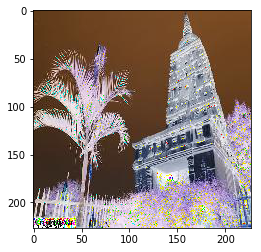

In [38]:
img=immatrix[1].reshape(227,227,3)
plt.imshow(img)

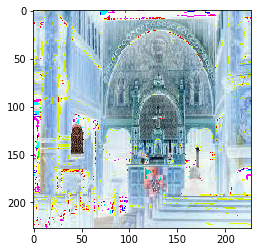

In [39]:
img=immatrix[20].reshape(227,227,3)
plt.imshow(img)

In [40]:
print(train_data[0].shape)

(56, 154587)


In [41]:
print(train_data[1].shape)

(56,)


In [57]:
x,y=(train_data[0],train_data[1])

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=2)

In [59]:
x_train=x_train.reshape(x_train.shape[0],227,227,3)
x_test=x_test.reshape(x_test.shape[0],227,227,3)

In [60]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [61]:
x_train/=255
x_test/=255

In [62]:
print(x_train.shape)
print(x_test.shape)

(33, 227, 227, 3)
(23, 227, 227, 3)


In [63]:
y_train=np_utils.to_categorical(y_train,5)
y_test=np_utils.to_categorical(y_test,5)

In [64]:
print(y_train.shape)
print(y_test.shape)

(33, 5)
(23, 5)


In [ ]:
#alexenet

In [67]:
model=Sequential()
model.add(Conv2D(96,(11,11),strides=(4,4),padding="valid",input_shape=(227,227,3)))
convout1=Activation('relu')
model.add(convout1)
model.add(MaxPooling2D((3,3),strides=(2,2)))
model.add(Conv2D(256,(5,5),padding="same"))
convout2=Activation('relu')
model.add(convout2)
model.add(MaxPooling2D((3,3),strides=(2,2)))
model.add(Conv2D(384,(3,3),padding="same"))
convout3=Activation('relu')
model.add(convout3)
model.add(Conv2D(384,(3,3),padding="same"))
convout4=Activation('relu')
model.add(convout4)
model.add(Conv2D(256,(3,3),padding="same"))
convout5=Activation('relu')
model.add(convout5)
model.add(MaxPooling2D((3,3),strides=(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(optimizer='adadelta',loss='categorical_crossentropy',metrics=["accuracy"])





In [70]:
model.fit(x_train,y_train,epochs=100,batch_size=14,validation_data=(x_test,y_test))

Train on 33 samples, validate on 23 samples
Epoch 1/100
33/33 [==============================] - 11s 339ms/step - loss: 11.7223 - acc: 0.2727 - val_loss: 12.6142 - val_acc: 0.2174
Epoch 2/100
33/33 [==============================] - 11s 342ms/step - loss: 11.7223 - acc: 0.2727 - val_loss: 12.6142 - val_acc: 0.2174
Epoch 3/100
33/33 [==============================] - 12s 355ms/step - loss: 11.7223 - acc: 0.2727 - val_loss: 12.6142 - val_acc: 0.2174
Epoch 4/100
33/33 [==============================] - 12s 352ms/step - loss: 11.7223 - acc: 0.2727 - val_loss: 12.6142 - val_acc: 0.2174
Epoch 5/100
33/33 [==============================] - 12s 354ms/step - loss: 11.7223 - acc: 0.2727 - val_loss: 12.6142 - val_acc: 0.2174
Epoch 6/100
33/33 [==============================] - 12s 351ms/step - loss: 11.7223 - acc: 0.2727 - val_loss: 12.6142 - val_acc: 0.2174
Epoch 7/100
33/33 [==============================] - 12s 350ms/step - loss: 11.7223 - acc: 0.2727 - val_loss: 12.6142 - val_acc: 0.2174
Epoc

In [71]:
score=model.evaluate(x_test,y_test)
print("test score",score[0])
print("test accuracy",score[1])
print(model.predict_classes(x_test[1:5]))
print(y_test[1:5])

23/23 [==============================] - 1s 47ms/step
test score 12.61416244506836
test accuracy 0.21739129722118378
[0 0 0 0]
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [73]:
path3="C:\dataset 2 after preprocessing vgg16"
for file in listing:
    im=Image.open(path1 +'\\'+ file)
    im=im.resize((224,224))
    im.save(path3 + '\\'+ file,"JPEG")

In [74]:
list3=os.listdir(path3)

In [76]:
immatrix_new=np.array([np.array(Image.open('C:\dataset 2 after preprocessing vgg16' + '\\'+ i)).flatten() for i in list3],'f')

In [77]:
label_new=np.ones((immatrix_new.shape[0],),dtype=int)

In [78]:
label[0:14]=0
label[14:25]=1
label[25:36]=2
label[36:49]=3
label[49:]=4

In [79]:
d,l=shuffle(immatrix_new,label_new,random_state=2)

In [80]:
train=[d,l]

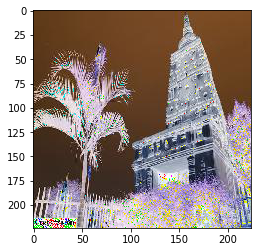

In [82]:
img=immatrix_new[1].reshape(224,224,3)
plt.imshow(img)

In [83]:
print(train[0].shape,train[1].shape)
X,Y=(train[0],train[1])
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.4,random_state=3)

(56, 150528) (56,)


In [85]:
train_x=train_x.reshape(train_x.shape[0],224,224,3)
test_x=test_x.reshape(test_x.shape[0],224,224,3)

In [87]:
train_x.astype('float32')
test_x.astype('float32')
train_x/=255
test_x/=255

In [88]:
train_y=np_utils.to_categorical(train_y,5)
test_y=np_utils.to_categorical(test_y,5)


In [89]:
print(train_y.shape)
print(test_y.shape)

(33, 5)
(23, 5)


In [91]:
#vgg16 net
model=Sequential()

#Block1
model.add(Conv2D(64,(3,3),strides=(1,1),padding="same",input_shape=(224,224,3)))
convout1=Activation('relu')
model.add(convout1)
model.add(Conv2D(64,(3,3),strides=(1,1),padding="same"))
convout2=Activation('relu')
model.add(convout2)
model.add(MaxPooling2D((2,2),strides=(2,2)))


#Block2
model.add(Conv2D(128,(3,3),strides=(1,1),padding="same"))
convout3=Activation('relu')
model.add(convout3)
model.add(Conv2D(128,(3,3),strides=(1,1),padding="same"))
convout4=Activation('relu')
model.add(convout4)
model.add(MaxPooling2D((2,2),strides=(2,2)))

#Block3
model.add(Conv2D(256,(3,3),strides=(1,1),padding="same"))
convout5=Activation('relu')
model.add(convout5)
model.add(Conv2D(256,(3,3),strides=(1,1),padding="same"))
convout6=Activation('relu')
model.add(convout6)
model.add(Conv2D(256,(3,3),strides=(1,1),padding="same"))
convout7=Activation('relu')
model.add(convout7)
model.add(MaxPooling2D((2,2),strides=(2,2)))


#Block4
model.add(Conv2D(512,(3,3),strides=(1,1),padding="same"))
convout8=Activation('relu')
model.add(convout8)
model.add(Conv2D(512,(3,3),strides=(1,1),padding="same"))
convout9=Activation('relu')
model.add(convout9)
model.add(Conv2D(512,(3,3),strides=(1,1),padding="same"))
convout10=Activation('relu')
model.add(convout10)
model.add(MaxPooling2D((2,2),strides=(2,2)))

#Block5
model.add(Conv2D(512,(3,3),strides=(1,1),padding="same"))
convout11=Activation('relu')
model.add(convout11)
model.add(Conv2D(512,(3,3),strides=(1,1),padding="same"))
convout12=Activation('relu')
model.add(convout12)
model.add(Conv2D(512,(3,3),strides=(1,1),padding="same"))
convout13=Activation('relu')
model.add(convout13)
model.add(MaxPooling2D((2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))
model.compile(optimizer='adadelta',loss='categorical_crossentropy',metrics=["accuracy"])


In [93]:
model.fit(train_x,train_y,epochs=100,batch_size=11,validation_data=(test_x,test_y))

Train on 33 samples, validate on 23 samples
Epoch 1/100
33/33 [==============================] - 100s 3s/step - loss: 1.5015 - acc: 0.6667 - val_loss: 1.6586e-07 - val_acc: 1.0000
Epoch 2/100
33/33 [==============================] - 97s 3s/step - loss: 9.3923e-06 - acc: 1.0000 - val_loss: 1.5549e-07 - val_acc: 1.0000
Epoch 3/100
33/33 [==============================] - 107s 3s/step - loss: 8.2706e-06 - acc: 1.0000 - val_loss: 1.4512e-07 - val_acc: 1.0000
Epoch 4/100
33/33 [==============================] - 101s 3s/step - loss: 7.4018e-06 - acc: 1.0000 - val_loss: 1.4253e-07 - val_acc: 1.0000
Epoch 5/100
33/33 [==============================] - 96s 3s/step - loss: 6.6631e-06 - acc: 1.0000 - val_loss: 1.3994e-07 - val_acc: 1.0000
Epoch 6/100
33/33 [==============================] - 96s 3s/step - loss: 6.0779e-06 - acc: 1.0000 - val_loss: 1.3476e-07 - val_acc: 1.0000
Epoch 7/100
33/33 [==============================] - 97s 3s/step - loss: 5.5577e-06 - acc: 1.0000 - val_loss: 1.2439e-07 - 

33/33 [==============================] - 64s 2s/step - loss: 5.3644e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 60/100
33/33 [==============================] - 64s 2s/step - loss: 5.1296e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 61/100
33/33 [==============================] - 64s 2s/step - loss: 4.7684e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 62/100
33/33 [==============================] - 64s 2s/step - loss: 4.7684e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 63/100
33/33 [==============================] - 64s 2s/step - loss: 4.7684e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 64/100
33/33 [==============================] - 64s 2s/step - loss: 4.7684e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 65/100
33/33 [==============================] - 64s 2s/step - loss: 4.7684e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 66/100
33/33 [=============

In [94]:
score=model.evaluate(test_x,test_y)
print("test score",score[0])
print("test accuracy",score[1])
print(model.predict_classes(test_x[1:5]))
print(test_y[1:5])

23/23 [==============================] - 11s 457ms/step
test score 1.1920928955078125e-07
test accuracy 1.0
[1 1 1 1]
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [95]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
activation_19 (Activation)   (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
activation_20 (Activation)   (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
activation_21 (Activation)   (None, 112, 112, 128)     0         
__________